<a href="https://colab.research.google.com/github/thuranaing411/-/blob/master/testing_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
import matplotlib.transforms as transforms

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
plt.bar

<function matplotlib.pyplot.bar>

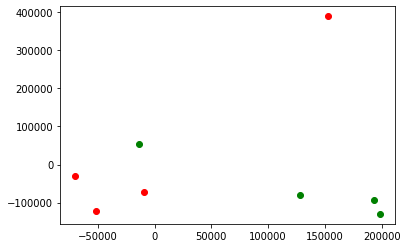

In [16]:
plt.scatter(df[0],df[2] , color = 'red')
plt.scatter(df[1],df[3] ,color = 'green')

In [19]:
df[0].mean

<bound method Series.mean of 1992     -8941.531897
1993    -51896.094813
1994    152336.932066
1995    -69708.439062
Name: 0, dtype: float64>

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1992 to 1995
Columns: 3650 entries, 0 to 3649
dtypes: float64(3650)
memory usage: 114.1 KB


In [38]:
mean = df.mean(axis=(1))
mean.values

array([33312.10747554, 41861.85954107, 39493.3049414 , 47743.55096927])

In [37]:
std = df.std(axis = (1))
std.values

array([200630.90155252,  98398.35620334, 140369.92524017,  69781.18546914])

<BarContainer object of 4 artists>

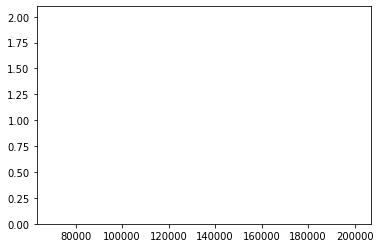

In [96]:
plt.bar(std.values,2)

In [48]:
confidence = 1.96 * (std.values / math.sqrt(3650))#formula for a confidence interval (CI) 
confidence

array([6508.89796997, 3192.25431369, 4553.90228709, 2263.85174431])

In [43]:
a = math.sqrt(len(df.colums))

60.41522986797286

In [44]:
60.41**2

3649.3680999999997

In [54]:
threshold = 42500
def colorForBar(mean, threshold, confidence):
    if (mean - confidence) <= threshold and (mean + confidence) >= threshold:
        return "white"
    
    if mean < threshold:
        return "blue"
    
    if mean > threshold:
        return "red"
colors=[colorForBar(mean.iloc[0], threshold, confidence[0]),
        colorForBar(mean.iloc[1], threshold, confidence[1]), 
        colorForBar(mean.iloc[2], threshold, confidence[2]), 
        colorForBar(mean.iloc[3], threshold, confidence[3])]

<BarContainer object of 4 artists>

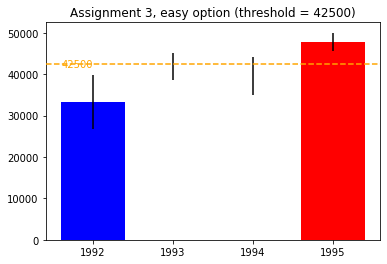

In [77]:
plt.axhline(y=threshold, zorder=10, linestyle="--", color="orange")
#trans = transforms.blended_transform_factory(plt.get_yticklabels()[0].get_transform(), plt.transData)
plt.text(0,threshold, "{:.0f}".format(threshold), color="orange", 
        ha="right", va="center")
plt.xticks(np.arange(len(df.index)), df.index)

plt.title("Assignment 3, easy option (threshold = {})".format(threshold))
plt.bar(range(df.shape[0]), mean, yerr=confidence,
        align='center', color=colors)


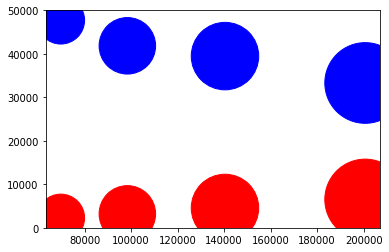

In [83]:
plt.style.use('seaborn-colorblind')
plt.scatter(std,confidence,s = confidence,c = 'r',cmap = 'viridis' )
plt.scatter(std,mean,s = confidence,c = 'b',cmap = 'viridis' )